In [6]:
import pandas as pd

raw_df = pd.read_csv('data/sms_project_data.csv')
raw_df.head()

,Link,Title Screening (Passed or not),Comment on Title Screening (Always needed if excluded),Abstract Screening (Passed or not),Comment on Abstract Screening,Year,KEYWORDS: Topics (Focus Area),KEYWORDS: Types of research,KEYWORDS: Type of Organization (Determined by association of main researcher)
0,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Unsure,Might be in the realm of theoretical?,NaN,NaN,NaN,NaN
1,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Excluded,Nothing to do with cloud deployment (or edge),NaN,NaN,NaN,NaN
2,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2025.0,Autonomous navigation,Evaluation research,University
3,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,Fault Detection might be industry application?,Included,NaN,2025.0,"Fault Detection in Cloud Computing, Autonomous...","Solution Proposal, Validation Research",University
4,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2024.0,"Advanced driver assistance systems (ADASs), cl...","Solution Proposal, Validation Research",University


In [7]:
filtered_df = raw_df[raw_df['Abstract Screening (Passed or not)'] == 'Included']
filtered_df.head()

,Link,Title Screening (Passed or not),Comment on Title Screening (Always needed if excluded),Abstract Screening (Passed or not),Comment on Abstract Screening,Year,KEYWORDS: Topics (Focus Area),KEYWORDS: Types of research,KEYWORDS: Type of Organization (Determined by association of main researcher)
2,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2025.0,Autonomous navigation,Evaluation research,University
3,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,Fault Detection might be industry application?,Included,NaN,2025.0,"Fault Detection in Cloud Computing, Autonomous...","Solution Proposal, Validation Research",University
4,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2024.0,"Advanced driver assistance systems (ADASs), cl...","Solution Proposal, Validation Research",University
7,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2025.0,Large Models as a Service in Industrial IoT,Survey Research,University
11,https://ieeexplore-ieee-org.ep.bib.mdh.se/docu...,Included,NaN,Included,NaN,2025.0,"Agricultural Internet of Things (IoT), Edgecen...","Solution Proposal, Validation Research",University


In [9]:
df = filtered_df.iloc[:, -4:]
df.head()

,Year,KEYWORDS: Topics (Focus Area),KEYWORDS: Types of research,KEYWORDS: Type of Organization (Determined by association of main researcher)
2,2025.0,Autonomous navigation,Evaluation research,University
3,2025.0,"Fault Detection in Cloud Computing, Autonomous...","Solution Proposal, Validation Research",University
4,2024.0,"Advanced driver assistance systems (ADASs), cl...","Solution Proposal, Validation Research",University
7,2025.0,Large Models as a Service in Industrial IoT,Survey Research,University
11,2025.0,"Agricultural Internet of Things (IoT), Edgecen...","Solution Proposal, Validation Research",University


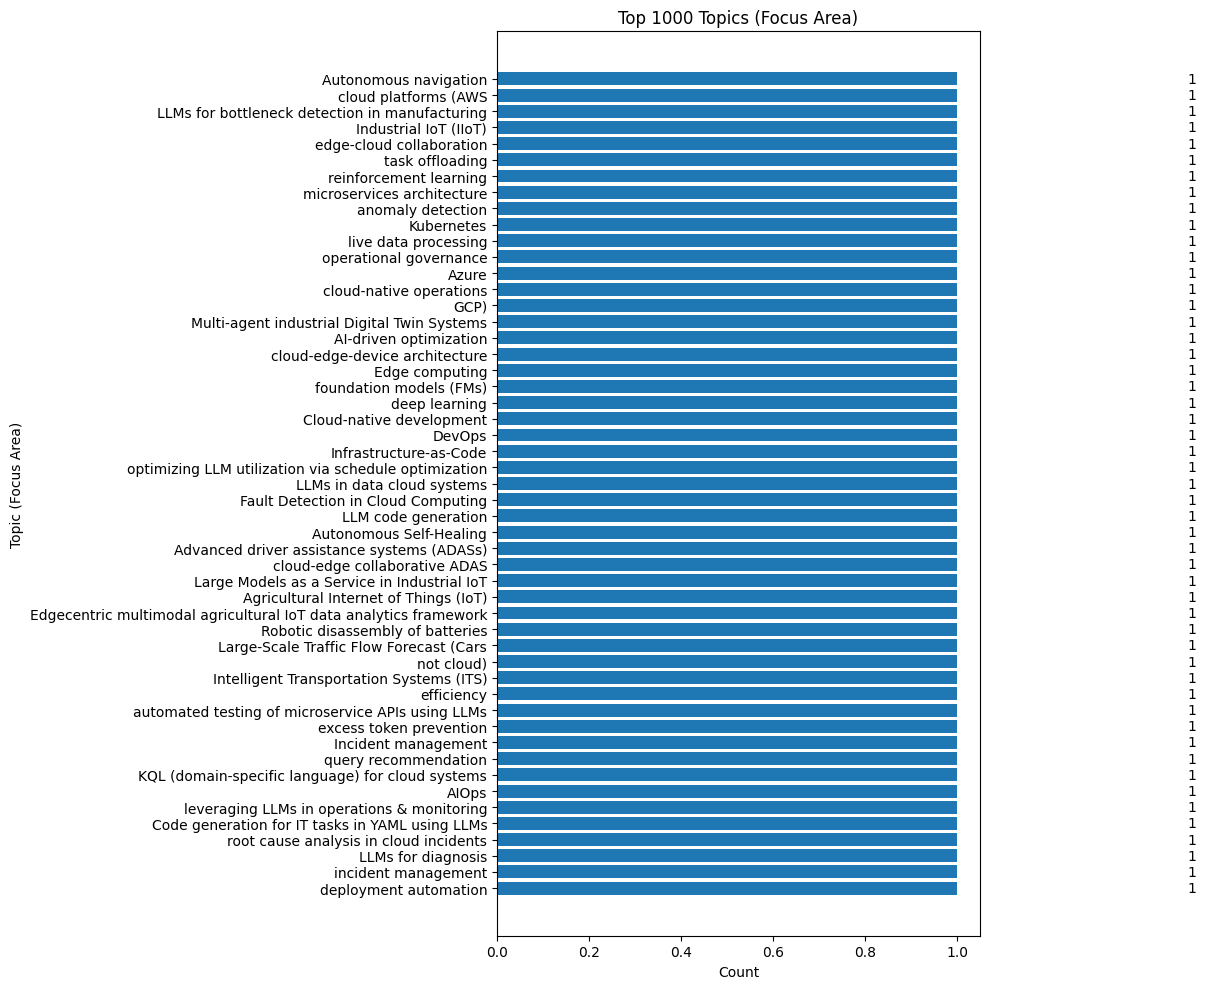

In [19]:
import matplotlib.pyplot as plt

# Show only the top 15 topics
top_n = 1000
top_topic_counts = topic_counts.head(top_n)

plt.figure(figsize=(10, 10))
bars = plt.barh(top_topic_counts.index[::-1], top_topic_counts.values[::-1])  # reverse for descending order
plt.xlabel('Count')
plt.ylabel('Topic (Focus Area)')
plt.title(f'Top {top_n} Topics (Focus Area)')
plt.tight_layout()

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, int(bar.get_width()), va='center')

plt.show()

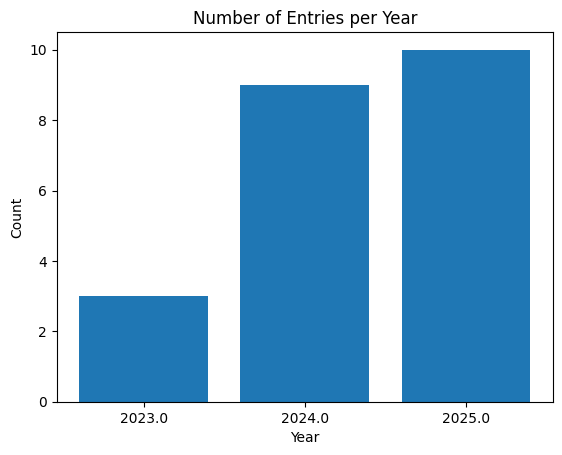

In [11]:
import matplotlib.pyplot as plt

year_counts = df['Year'].value_counts().sort_index()
plt.bar(year_counts.index.astype(str), year_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Entries per Year')
plt.show()

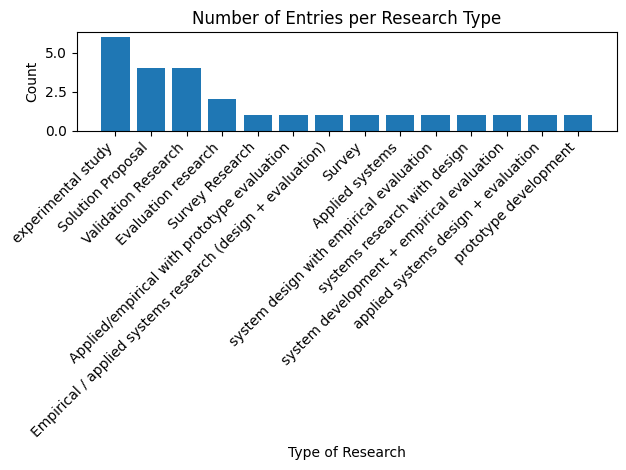

In [12]:
import matplotlib.pyplot as plt

# Split and explode the research types
types_series = df['KEYWORDS: Types of research'].str.split(',').explode().str.strip()

# Count each type
type_counts = types_series.value_counts()

# Plot
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type of Research')
plt.ylabel('Count')
plt.title('Number of Entries per Research Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

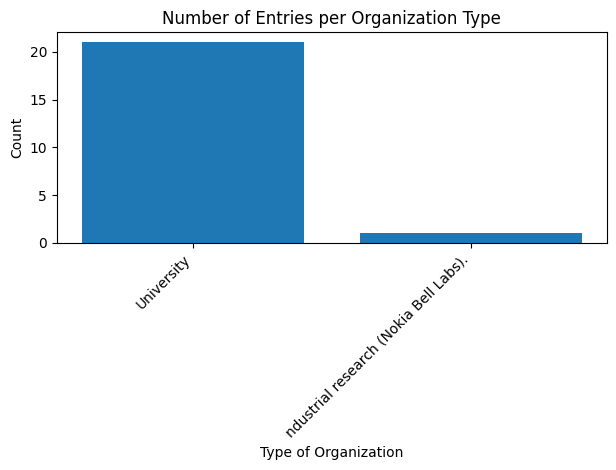

In [13]:
import matplotlib.pyplot as plt

# Split and explode the organization types
org_types_series = df['KEYWORDS: Type of Organization (Determined by association of main researcher)'].str.split(',').explode().str.strip()

# Count each type
org_type_counts = org_types_series.value_counts()

# Plot
plt.bar(org_type_counts.index, org_type_counts.values)
plt.xlabel('Type of Organization')
plt.ylabel('Count')
plt.title('Number of Entries per Organization Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()